In [5]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import System, S

system = (
    System()
    .add_coordinate(r'\theta', space=S)
    .add_constant('m g l')
    .define('x y', 'l * sin(theta), - l * cos(theta)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
system.show_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dot t 1 5*t**4
ddot t 2 20*t**3
dddot t 3 60*t**2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
from mechanics.integrator import RK4
system_d = (
    system.discretization()
    .add_constant('N h')
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(RK4('h'))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Unknowns: [{k_{1\ddot{\theta}}}(i,), x(i,), \theta(i + 1,), {k_{2\ddot{\theta}}}(i,), \dot{\theta}(i + 1,), y(i,), E(i,), L(i,), {k_{3\dot{\theta}}}(i,), T(i,), {k_{4\dot{\theta}}}(i,), {k_{2\dot{\theta}}}(i,), U(i,), {k_{1\dot{\theta}}}(i,), t(i,), {k_{3\ddot{\theta}}}(i,), {k_{4\ddot{\theta}}}(i,)]
Variables: (\theta(i,), \dot{\theta}(i,), \ddot{\theta}(i,), {k_{1\dot{\theta}}}(i,), {k_{2\dot{\theta}}}(i,), {k_{3\dot{\theta}}}(i,), {k_{4\dot{\theta}}}(i,), {k_{1\ddot{\theta}}}(i,), {k_{2\ddot{\theta}}}(i,), {k_{3\ddot{\theta}}}(i,), {k_{4\ddot{\theta}}}(i,), t(i,), x(i,), y(i,), T(i,), U(i,), L(i,), E(i,))


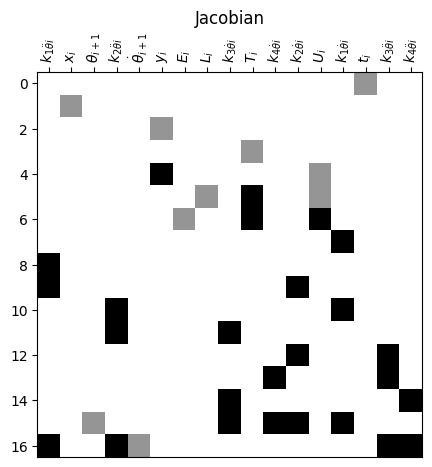

In [8]:
solver = system_d.solver()
solver.plot_jacobian()

In [9]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 10000,
    'h': 0.01,
    'theta': np.pi/4,
    'dottheta': 0,
})
# result.newton_converged_iters

i = 0, ..., 10000


100%|██████████| 10001/10001 [00:01<00:00, 8415.81it/s]


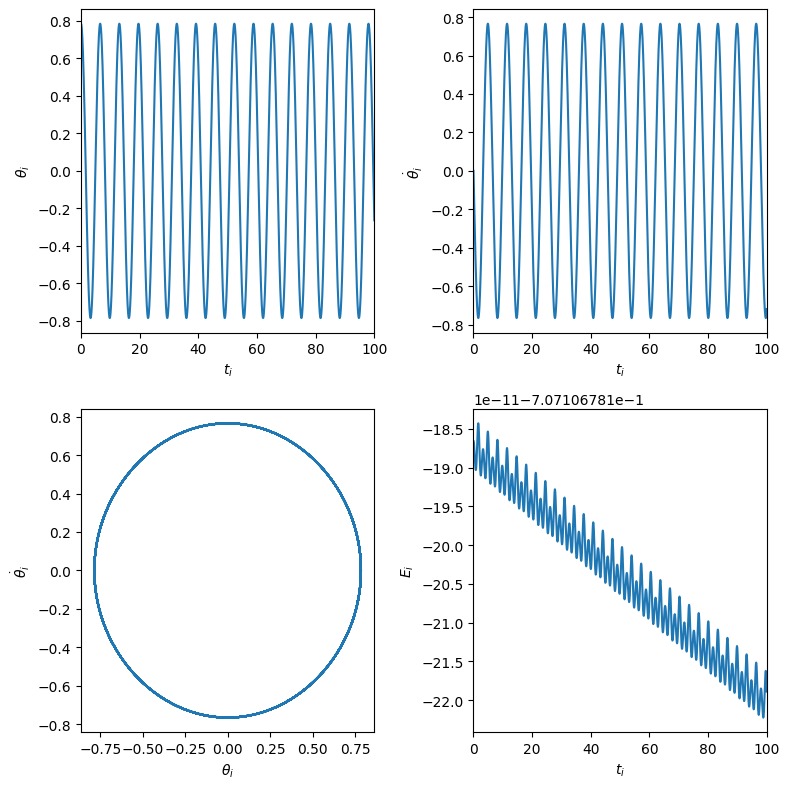

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='tight', subplot_kw={'projection': result})
axes = axes.flatten()

axes[0].plot('theta')
axes[1].plot('dottheta')
axes[2].plot('theta', 'dottheta')
axes[3].plot('E')